$\qquad$ $\qquad$$\qquad$ **TDA 231 Machine Learning: Homework 1** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Introduction to Probability,  MLE and Jupyter python Notebook**<br />
$\qquad$ $\qquad$$\qquad$ **Grader: Emilio** <br />
$\qquad$ $\qquad$$\qquad$ **Submitted by: Pontus Havström, 970817-6459, ponhav@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$ **&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Qufei Wang, 900212-6952, qufei@student.chalmers.se**

General guidelines:
* All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. 
All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
* Your name, personal number and email address should be specified above.
* All tables and other additional information should be included in this notebook.
* ** Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com **
* ** Upload both the .ipynb and the generatable .html file (that can be exported through File > Download As > HTML) **

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://colab.research.google.com
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:
1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://data-blog.udacity.com/posts/2016/10/latex-primer/ (latex-primer)
4. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)

# Theoretical problems

## [Bayes Rule, 3 points]

After your yearly checkup, the doctor has bad news and good news. The
bad news is that you tested positive for a very serious cancer and
that the test is 99.2% accurate i.e. the probability of testing
positive given you have the disease is 0.992. The probability of
testing negative if you don’t have the disease is the same (also 0.992). The good news is that it is a rare condition affecting only 1 in 1,000 people. What is the probability you actually have the disease? 

After doing all your calculations you realize that there was a misprint on the test, and the accuracy was actually only 92% (for both testing postive given that you have the disease and for testing negative given that you do not have the disease). How will this change your probability of having the disease?

(Show all calculations and the final result.)


## [Setting hyperparameters, 2 points]

Suppose $\theta$ is a random variable generated from a beta distribution as: $\theta \sim \mbox{Beta}(a^2,b)$. Also assume that  the expectation of $\theta$ is $m$: $E[\theta] = m$
and the variance of $\theta$ is v: $\mbox{var}(\theta) = v$. Express $a$ and $b$ in term of (only) $m$ and $v$.
For more information about the $\mbox{Beta}$ distribution see https://en.wikipedia.org/wiki/Beta_distribution.


## [Correlation and Independence, 2 points]

Let $X$ be a continuous random variable, uniformly distributed in $[-2, +2]$ and let $Y := X^4$. Clearly $Y$ is not independent of $X$ -- in fact it is uniquely determined by $X$. However, show that the covariance of $X$ and $Y$ is 0: $\mbox{cov}(X, Y ) = 0$.
Show and justify every step of the proof. Statements like "it is obvious that, it is trivial ..." will not be accepted.

Write Answers  here. Double-click (or enter) to edit. Latex mathematical expressions can just be written by starting with "$" and ending with the same character.

## Bayes Rules
First, we can start by defining some notation for the possible cases in the problem:

*   $T$ = You test positive the cancer disease
*   $\overline{T}$ = You test negative for the cancer disease
*   $C$ = You have the cancer disease
*   $\overline{C}$ =  You don't have the cancer disease

We want to know the probability of us actually having the disease after testing positive for it. What we then seek to calculate is the conditional probability of having the disease ($C$), given that we have tested positive for the disease ($T$), that is 

$$p(C|T)$$

In the problem formulation, we were given the true positive rate, which is the probability of testing positive given that you have the disease. This can be expressed as the conditional probability

$$p(T|C) = 99.2\% = 0.992$$

where the given true positive rate has been plugged in.

We were also given the probability of testing negative for the cancer disease given that we do not have the disease (the true negative rate):

$$p(\overline{T}|\overline{C}) = 99.2\% = 0.992$$

This lets us calculate the false positive rate, which is the probability of testing positive when not having the disease $p(T|\overline{C})$, by using the sum rule:

$$p(\overline{T}|\overline{C}) + p(T|\overline{C}) = 1 \implies p(T|\overline{C}) = 1 - 0.992 = 0.8\% = 0.008$$

The probability that we want to compute can be obtained using Bayes' theorem, according to 

$$p(C|T) = \frac{p(C)p(T|C)}{p(T)}\quad(1)$$

where $p(C)$ is the probability of having the cancer disease and $p(T)$ is the probability of testing positive for the cancer disease (without any conditionality). $p(T|C)$ is, as previously described, the already known true positive rate of the test.

The cancer disease was known to affect 1 in 1000 people, so the probability of having the disease can be assumed to be

$$p(C) = \frac{1}{1000} = 0.1\% = 0.001$$

We then also know the probability of not having the disease (assuming there are no other factors which affect having the cancer disease or not) by normalization of probabilities:

$$p(\overline{C}) = 1 - p(C) = 1 - 0.001 = 0.999$$

The probability of testing positive for the disease, $p(T)$, can be computed by the *marginalisation* rule. The first case being that we have the disease (with a probability of $p(C)=0.1\%$), in which case the test is positive $99.2\%$ of the time. The second case is that we don't have the disease (with a probability of $p(\overline{C})=99.9\%$), in which case the test is incorrectly positive $0.8\%$ of the time. The probability for each case is given by the product of the disease probability and the conditional test probability. Finally, the total probability of testing positive, $p(T)$, is equal to the sum of the two cases' probabilities. This gives

$$p(T) = p(T, C) + p(T, \overline{C}) = p(T|C)p(C) + p(T|\overline{C})p(\overline{C}) = 0.992\cdot0.001 + 0.008\cdot0.999 \approx 0.0090 $$
<br><br>

We now know $p(T)$, $p(C)$ and p$(T|C)$. Inserting these probabilities into Bayes' theorem (1) we get the probability of having the cancer disease given our positive test result:

$$p(C|T) = \frac{p(C)p(T|C)}{p(T)} = \frac{0.001\cdot0.992}{0.009} \approx 0.11 = 11\%$$

**Answer**: the probability of us actually having the disease given the provided data and our positive test is approximately $11\%$ (which is quite high).

For the second part of the problem, we know that the actual true positive and true negative rates are both equal to $92\%$. 

We can quickly recalculate the affected probabilities (assuming the probability of having the disease still is 1 in 1000):
$$p(T|C) = 92\% = 0.92$$
$$p(T|\overline{C}) = 1 - p(\overline{T}|\overline{C}) = 1-0.92 = 8\% = 0.08$$

This gives, according to the above derived expression for $p(T)$:
$$p(T) =  p(T|C)p(C) + p(T|\overline{C})p(\overline{C}) = 0.92\cdot 0.001 + 0.08\cdot 0.999 = 0.08084$$

By Bayes' theorem, we then have that
$$p(C|T) = \frac{p(C)p(T|C)}{p(T)} = \frac{0.001\cdot0.92}{0.08084} \approx 0.011= 1.1\%$$

**Answer**: with the (presumably) correct test rates, the probability of us actually having the disease given that we tested positive is approximately $1.1\%$. This is smaller than the previous result, which is reasonable as the true positive rate decreased while the probability of having the disease stayed the same (meaning that it is more likely that the test result was inaccurate).

## Setting hyperparameters
The beta distribution for a pair of shape parameters $a^2$ and $b$ defined on the continuous interval $t\in[0,1]$ is given by 
$$\beta(t;a^2,b) = \frac{t^{a^2-1}(1-t)^{b-1}}{B(a^2,b)}$$
where $B(a^2,b)$ is a normalization constant, ensuring that the total probability of the distribution is equal to unity.

We have that the expectation value of random variable $\theta$ generated from the beta distribution with parameters $a^2$ and $b$ is given by (from the definition of the expectation value of a random variate from a continuous distribution)
$$m = \mathbf{E}_{\beta(t;a^2,b)}[\theta] = \int_t t\beta(t;a^2,b)dt = \int_0^1 t\frac{t^{a^2-1}(1-t)^{b-1}}{B(a^2,b)}dt$$
Solving this integral yields the following expression for $m$ (as described here: https://en.wikipedia.org/wiki/Beta_distribution#Mean), depending only the parameters $a^2$ and $b$:
$$m = \frac{a^2}{a^2+b}\quad(1)$$

Furthermore, the variance of the random variate $\theta$ is given by the second moment ordinal centered on the expected value $m$:
$$v = \mathrm{var}[\theta] = \mathbf{E}_{\beta(t;a^2,b)}[(\theta-m)^2]$$
This expectation value can be shown to yield the following expression (as described here: https://en.wikipedia.org/wiki/Beta_distribution#Variance), also only dependent on the parameters $a^2$ and $b$:
$$v = \frac{a^2b}{(a^2+b)^2(a^2+b+1)}\quad(2)$$

We now have expressed both $m$ and $v$ in terms of only the parameters $a^2$ and $b$. To arrive at expressions  for $a$ and $b$ dependent on only $m$ and $v$, we solve equations (1) and (2) for the parameters $a$ and $b$.

$$(1) \implies b = \frac{a^2}{m}-a^2 = a^2\frac{1-m}{m}$$
Inserting this expression for $b$ in equation (2) and solving for $a$ gives
$$a = \sqrt{\frac{m^2-m^3-mv}{v}}$$
Finally, inserting this expression for $a$ in the above derived expression for $b$ in terms of $a$ and $m$ gives
$$b = \frac{m^3-2m^2+m(1+v)-v}{v} =\frac{m^3-2m^2+m}{v}+m-1$$

## Correlation

**Answer:** The probability density function of $X$ is:
$$
 p(x) = 
  \begin{cases} 
   1/4, & -2 \leq x \leq 2 \\
   0,       & \text{otherwise}
  \end{cases}
$$
By the definition of covariance of two random variables:
$$cov(X,Y) = E[(X - E(X))(Y - E(Y))] = E(XY) - E(X)E(Y)$$
Substitute $y = x^4$, we have,
\begin{align*}
cov(X,Y) &= \int_{-2}^{2} \left(\frac{1}{4}\right)\cdot x^5dx - \int_{-2}^{2}\left(\frac{1}{4}\right)xdx\cdot \int_{-2}^{2}\left(\frac{1}{4}\right)x^4dx \\
         &= \left(\frac{1}{24}\right) \cdot \left.x^6\right|_{-2}^{2} - \left(\frac{1}{8}\right) \cdot \left.x^2\right|_{-2}^{2} \cdot \int_{-2}^{2}\left(\frac{1}{4}\right)x^4dx
\end{align*}
Notice that,
$$\left.x^6\right|_{-2}^{2} = \left.x^2\right|_{-2}^{2} = 0$$
finally we have,
$$cov(X, Y) = 0$$


# Practical problems

**Useful python libraries/functions:**
* **General:**  shape, reshape, np.mean etc.
* **Plotting:** plot, scatter, legend, hold, imshow, subplot, grid, title etc. Always show legends for your plots.
* **Code:**  Make sure your code is well commented and variables have intuitive names. Organize your code into functions and comment on the input and output.

## [Spherical Gaussian estimation, 9 points]

Consider a dataset $X$ consisting of i.i.d. observations
generated from a spherical Gaussian distribution $N(\mu, 2\sigma^2I)$, where $\mu \in \mathbb{R}^p$, $I$ 
is the $p \times p $ identity matrix, and $\sigma^2$ is a scalar.

(a) Write the mathematical expression for the Maximum Likelihood Estimator (MLE) for $\mu$ and $\sigma$ in above setup. (HINT: Use latex equations here).

(b) Implement a function **sge(X)** that estimates the mean $\mu$ and the standard deviation $\sigma$ from the given data $X$, using exactly the mathematical expression derived in (a). Note: You cannot use **numpy.cov**, **numpy.mean**, **numpy.sum** or any other library functions for calculating the mean, variance, standard deviation. (Hint: A skeleton of this function **sge(X)** is provided in the code from the next cell).

(c) Implement a function **myplot1(X)** which takes as input the dataset $X$; and draws, on the same plot, the following:
1. A scatter plot of the original data $X$, 
2. Circles with center $\mu$ and radius $r= \sqrt{2}k\sigma$ for $k=1, 2, 3$ where $\mathbf{\mu}$ and $\sigma$ denotes the mean and standard deviation estimated using **sge(X)**. 
3. Legend for each circle indicating the fraction of points (in the original dataset) that lie outside the circle boundary.

(d) Load the dataset from http://bit.ly/HW1_2019 and run your code using only the first two features of the dataset. Submit the resulting plot as well as your implementation here.

For more information about the spherical Gaussian distribution, see https://en.wikipedia.org/wiki/Multivariate_normal_distribution.
For more information about the identity matrix see: https://en.wikipedia.org/wiki/Identity_matrix

**(a)** Suppose $\mathbf{X} = \{\mathbf{x_1}, \dots, \mathbf{x_N}\}$, where $\mathbf{x_i} = (x_{i1}, \dots, x_{ip})$ confirms to the spherical Gaussian distribution $N(\mu, 2\sigma^2I)$. Each $\mathbf{x_i}$ has the following probability density function:
$$p(\mathbf{x_i}) = \left.\frac{1}{(2\pi)^{p/2}|\Sigma|^{1/2}}\right.exp\{-\frac{1}{2}(\mathbf{x_i}-\mathbf{\mu})^{t}\Sigma^{-1}(\mathbf{x_i}-\mathbf{\mu})\}$$
where $\Sigma = 2\sigma^2I$ and $|\Sigma|$ is the determinant of $\Sigma$.
Because $\mathbf{X}$ is i.i.d, we have
$$p(\mathbf{X}) = \prod_{n=1}^{N}p(\mathbf{x_n})$$
Take the natural logarithm of $p(\mathbf{X})$
$$log(p(\mathbf{X})) = \sum_{n=1}^{N}log(p(\mathbf{x_n})) = -\left.\frac{pN}{2}\right.log2\pi - \left.\frac{N}{2}\right.log|\Sigma| - \left.\frac{1}{2}\right.\sum_{n=1}^{N}((\mathbf{x_n} - \mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x_n} - \mathbf{\mu}))$$
Take the partial derivative over $\mathbf{\mu}$ and $\sigma$ separately, and equals it to 0, we have
\begin{align} 
 \frac{\partial{log(p(\mathbf{X}))}}{\partial{\mathbf{\mu}}} &= \sum_{n=1}^{N}\frac{1}{2\sigma^2}I(\mathbf{x_n} - \mu) = 0 \\
 \implies \mathbf{\mu} &= \frac{1}{N}\sum_{n=1}^{N}\mathbf{x_n}
\end{align}
and
\begin{align} 
 \frac{\partial{log(p(\mathbf{X}))}}{\partial\sigma} &= -pN\sigma^{-1} + \frac{\sigma^{-3}}{2}\sum_{n=1}^{N}[(\mathbf{x_n} - \mu)^{T}(\mathbf{x_n} - \mu)] = 0 \\
 \implies \sigma &= \sqrt{\frac{1}{2Np}\sum_{n=1}^{N}(\mathbf{x_n} - \mu)^T(\mathbf{x_n} - \mu)}
\end{align}

**See the process of deduction here**
\begin{align}
log(p(\mathbf{X})) &= \sum_{n=1}^{N}log(p(\mathbf{x_n})) = -\left.\frac{pN}{2}\right.log2\pi - \left.\frac{N}{2}\right.log|\Sigma| - \left.\frac{1}{2}\right.\sum_{n=1}^{N}((\mathbf{x_n} - \mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x_n} - \mathbf{\mu}))
\end{align}

We know $\Sigma = 2\sigma^2I$, so
\begin{align}
|\Sigma| &= |2\sigma^2I| = \left|\begin{pmatrix} 2\sigma^2 &  & \mathbf{0} \\  & \ddots&  \\ \mathbf{0} &  &  2\sigma^2 \end{pmatrix}\right| =  (2\sigma^2)^p = 2^p\sigma^{2p} \\
\Sigma^{-1} &= (2\sigma^2I)^{-1} = \frac{1}{2\sigma^2}I 
\end{align}

Substitute $|\Sigma|$ and $\Sigma^{-1}$ using $(2),(3)$ in $(1)$, we have
\begin{align}
log(p(\mathbf{X})) &= -\left.\frac{pN}{2}\right.log2\pi - \frac{pN}{2}log2 -  pNlog\sigma - \frac{1}{4\sigma^2}\sum_{n=1}^{N}((\mathbf{x_n} - \mathbf{\mu})^{T}(\mathbf{x_n} - \mathbf{\mu}))
\end{align}

From $(4)$, we have
\begin{align}
\frac{\partial{log(p(\mathbf{X}))}}{\partial\sigma} &= -pN\sigma^{-1} + \frac{\sigma^{-3}}{2}\sum_{n=1}^{N}[(\mathbf{x_n} - \mu)^{T}(\mathbf{x_n} - \mu)] = 0 \\
 \implies \sigma &= \sqrt{\frac{1}{2Np}\sum_{n=1}^{N}(\mathbf{x_n} - \mu)^T(\mathbf{x_n} - \mu)}
\end{align}

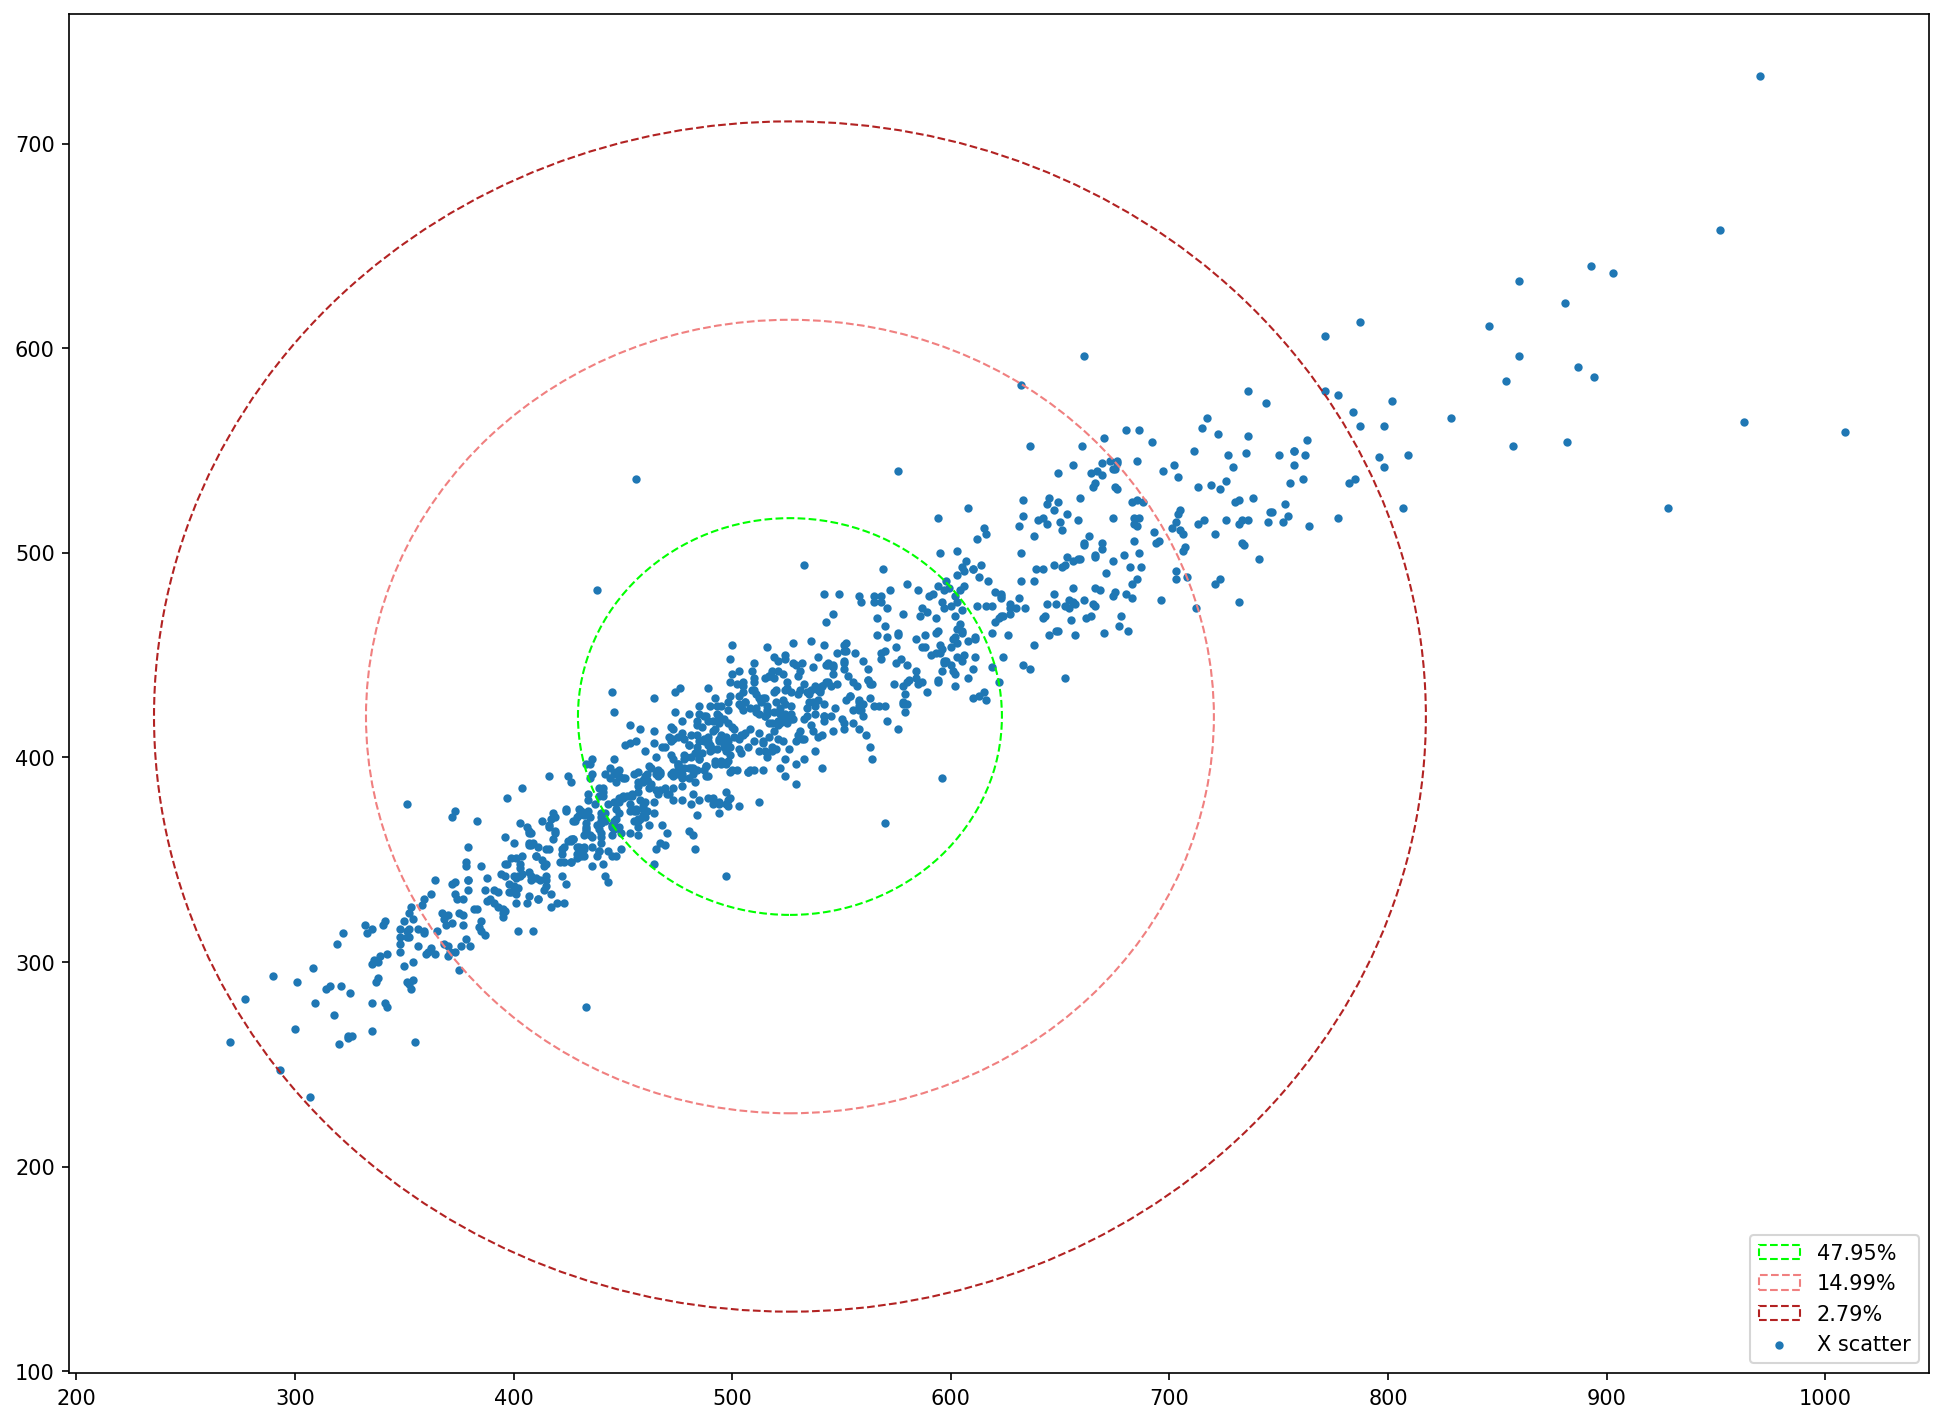

In [6]:
# Imports
import numpy as np                                                                            
import matplotlib                                                                             
import matplotlib.pyplot as plt                                                               
import matplotlib.patches as patches                                                          
                                                                                              
# answer for b                                                                                
def sge(X):
    """
    This function computes  the mean mu and standard deviation sigma 
    for a dataset coming from spherical Gaussian distribution N(mu, 2 sigma^2 I)

    @param X : A numpy array of size n x p where each row represents a p-dimensional data point
    e.g. X = [ [2, 1], [3, 7], [4 ,5] ] is a dataset with 3 samples having two coordinates each.
    @return mu: A numpy array of size p representing the estimated mean of the dataset
    @return sigma: A real number indicating the estimated standard deviation of the dataset
    """

    (n, p) = X.shape          # Get number of data points and number of features
    mu = np.zeros(p)          # Preallocate mean vector                                                                  

    # Calculate mu according to (a)                                                                                          
    for i in range(0, n):                                                                     
        mu += X[i, :]         # Sum x over data points                                                                  
    mu /= n                   # Average over number of data points                                                                  
    
    # Calculate sigma according to (a)                                                                                          
    a = 0.0                   # Preallocate variable for the sum in the expression for sigma                                                                  
    for i in range(0, n):                                                                     
        t = X[i, :] - mu                                                                      
        a += t.T@t            # Use @ operator for scalar multiplication of the two vectors                                                                  
    sigma = np.sqrt(a / (2 * n * p))                                                                        
    return mu, sigma                                                                          

# answer for c
def myplot1(X): 
    """
    This function takes a dataset X and does the following:
    1. draws the scatter plot of X (using only the first two features)
    2. calculates mu and sigma using function sge(). Then counts the number of points that lie outside of the circles.
    3. draws the circles with labels showing the fraction of data points lying outside each cicle

    @param X : A numpy array of size n x p where each row represents a p-dimensional data point
    output   : A figure showing a two-dimensional scatter-plot of the dataset X (using the first two features), 
               along with three circles centered in mu with radii r=sqrt(2)k sigma, where mu and sigma are 
               the mean and variance off the dataset
    Note that in order to get correct results, a maximum of two features may be used from the dataset 
    as the scatter plot is two-dimensional.
    """
    # Define figure and axes
    plt.figure(num=None, figsize=(16, 12), dpi=150)
    ax = plt.axes()
    # Draw scatter plot of dataset X (using the first two features)
    plt.scatter(X[:,0], X[:,1], label='X scatter', marker='.')
    
    # Calculate mean and standard deviation of the data set using sge(X)
    mu, sigma = sge(X[:, 0:2])      # Run sge(X) to calculate mean and standard deviation, using the first two features (for 2D-plot to make sense)
    x, y = mu[0:2]          # Define two-dimensional coordinate of the mean
    num1 = num2 = num3 = 0  # Preallocate counting variables for the three circles
    rows = X.shape[0]       # get number of data points (number of rows in X)
    aRadius = []            # Preallocate radii for circles
    
    # Append radii of the three circles
    for i in range(1, 4):
        aRadius.append(np.sqrt(2) * i * sigma)
    
    # Count the number of datapoints which lie outside each circle
    for i in range(0, rows):  # Iterate over datapoints
        d = np.sqrt((X[i, 0] - x) ** 2 + (X[i, 1] - y) ** 2) # Calculate two-dimensional distance from datapoint to mean mu=(x,y)
        if d > aRadius[2]:    # If distance is greater than all three radii...
            num3 += 1         # ... add one to count for each circle
            num2 += 1
            num1 += 1
        elif d > aRadius[1]:  # If distance lies between radii for circles with k=2 and k=3
            num2 += 1         # ... add one to count for circles k=1 and k=2
            num1 += 1
        elif d > aRadius[0]:  # If distance lies between radii for circles with k=1 and k=2
            num1 += 1         # ... add one to count for circle k=1
            
    # Define list of label strings, indicating the fraction (in percent) of datapoints lying outside each circle
    labels = ["{0:.2f}%".format(100 * num1 / rows), "{0:.2f}%".format(100 * num2 / rows),
             "{0:.2f}%".format(100 * num3 / rows)]
    colors = ['lime', 'lightcoral', 'firebrick'] # Colors for each circle
    
    # Add circle plots centered on two-dimensional mean with the three respective radii
    for i in range(0, 3):
        c = patches.Circle((x, y), radius = aRadius[i], fill = False, color = colors[i], ls = '--',
                           label = labels[i]) # Define circle
        ax.add_patch(c)       # Plot circle
    
    ax.legend()
                                                                                              
# answer for d                                                                            
dataset_source = np.DataSource().open('http://bit.ly/HW1_2019')   # Open the provided dataset                            
X = np.loadtxt(dataset_source)  # Load data from text file                                                                                                                                                       
myplot1(X[:, 0:2]) # Run myplot1(X) using first two features to generate figure
                                              